In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

### Задания к уроку 3

#### 1. Нарисуйте график функции: y(x) = k∙cos(x – a) + b для некоторых (2-3 различных) значений параметров k, a, b

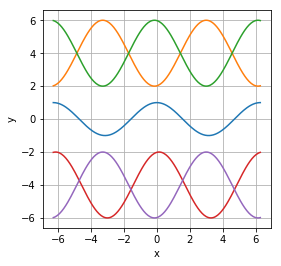

In [2]:
x = np.linspace(-2*np.pi, 2*np.pi, 200)
y = np.cos(x)

k1 = 2
a1 = 3
b1 = 4
y1 = k1 * np.cos(x - a1) + b1

k2 = -2
a2 = 3
b2 = 4
y2 = k2 * np.cos(x - a2) + b2

k3 = -2
a3 = -3
b3 = -4
y3 = k3 * np.cos(x - a3) + b3

k4 = 2
a4 = 3
b4 = -4
y4 = k4 * np.cos(x - a4) + b4

plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.gca().set_aspect("equal")

#### 3. Напишите код, который будет переводить полярные координаты (r, phi) в декартовы (x,y).

In [3]:
r = 5
phi = np.pi/2
x = r * np.cos(phi)
y = r * np.sin(phi)
print(x, y)

3.061616997868383e-16 5.0


#### Напишите код, который будет рисовать график окружности в полярных координатах.

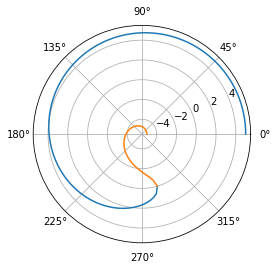

In [4]:
x = np.linspace(0, 5, 100)
r = 5
y1 = np.sqrt(r**2 - x**2)
plt.polar(x, y1)
y2 = -np.sqrt(r**2 - x**2)
plt.polar(x, y2)

#### 4. Решите систему уравнений:
#### y = x2 – 1
#### exp(x) + x∙(1 – y) = 1

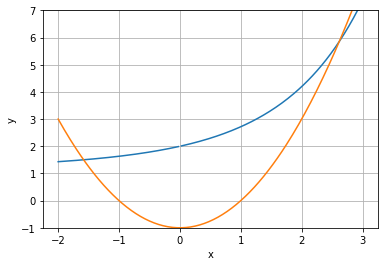

In [5]:
x = np.linspace(-2, 3, 201)
plt.plot(x, (np.exp(x) + x - 1)/x)
plt.plot(x, x**2 - 1)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1, 7)
plt.grid()
plt.show()

In [6]:
from scipy.optimize import fsolve

def equations(p):
    x, y = p
    return (y - x**2 + 1, np.exp(x) + x * (1 - y) - 1)

x1, y1 = fsolve(equations, (-2, 1))
print (x1, y1)

x2, y2 = fsolve(equations, (2, 6))
print (x2, y2)

-1.581835352893692 1.502203083670816
2.6181455730854304 5.854686241866794


### Задания к уроку 4

#### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [7]:
def move_roulette():
    val = np.random.randint(1, 37)
    if val == 37: 
        return False
    return val % 2 != 0

In [8]:
money_total = 100
win = 0
loss = 0
for p in range(100):
    bet = 1
    step = move_roulette()
    if step is True:
        money_total += bet
        win += 1
    else:
        money_total -= bet
        loss += 1
print("Выигрыш: ", win, "Проигрыш: ", loss, "На счету: ", money_total)

Выигрыш:  58 Проигрыш:  42 На счету:  116


#### 2. Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере подбрасывания монетки.
####    Сгенерируйте десять выборок случайных чисел х0, …, х9.
####    и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [9]:
def shoot():
    return np.random.uniform(0, N)

In [10]:
def move():
    while True:
        val = shoot()
        if val < 5:
            print("Бросок монетки, выпало - Орел:", val)
            return True
        else: 
            print("Бросок монетки, выпало - Решка:", val)
            return False

In [11]:
N = 10
M1 = 0
M2 = 0
for x in range(N):
    step = move()
    if step is True:
        M1 += 1
    else:
        M2 += 1
print("Итого: Орел - ", M1, ", Решка - ", M2)

Бросок монетки, выпало - Орел: 1.0638458046850008
Бросок монетки, выпало - Решка: 5.050159992814049
Бросок монетки, выпало - Решка: 7.175082958625991
Бросок монетки, выпало - Решка: 9.133376950002402
Бросок монетки, выпало - Решка: 7.238392410626196
Бросок монетки, выпало - Орел: 1.3442456135274372
Бросок монетки, выпало - Решка: 9.638605198689671
Бросок монетки, выпало - Орел: 4.481175116290952
Бросок монетки, выпало - Решка: 5.9368273761859065
Бросок монетки, выпало - Орел: 4.422285278450481
Итого: Орел -  4 , Решка -  6


In [12]:
p1 = float(M1)/N
print('Вероятность выпадения Орла:', p1)

Вероятность выпадения Орла: 0.4


In [13]:
p2 = float(M2)/N
print('Вероятность выпадения Решки:', p2)

Вероятность выпадения Решки: 0.6


In [14]:
p = p1 + p2
print('Сумма вероятностей противоположных событий:', p)

Сумма вероятностей противоположных событий: 1.0


(array([2., 0., 0., 1., 1., 1., 1., 3., 0., 1.]),
 array([0.15827888, 1.12779414, 2.0973094 , 3.06682466, 4.03633992,
        5.00585518, 5.97537044, 6.9448857 , 7.91440096, 8.88391622,
        9.85343148]),
 <a list of 10 Patch objects>)

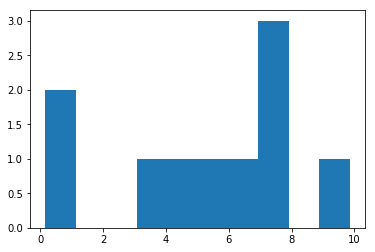

In [15]:
y = [shoot() for v in range(N) ]
plt.hist(y)